# Sentiment analysis using Yelp dataset

The purpose of this project is to do text classification analysis in  Python. We shall be using a Yelp dataset to predict the star rating using the reviews or the text data present.

Firstly we shall load the common packages used in this project.

In [1]:
#Libraries used for the project
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Ignore specific warnings
import warnings
warnings.filterwarnings('ignore')

sns.set(style = "white")
%matplotlib inline

Now that we have loaded the packages, we shall load the dataset used in the analysis/project.

In [2]:
yelp = pd.read_csv("yelp_reviews.csv")
yelp.head(10)

,stars,text
0,5,I love love LOVE this place. My boss (who is i...
1,5,The best !\n\nFrom my first shredded beef taco...
2,5,I love Coach.\nStylish and trendy without spen...
3,5,This place is great!
4,5,I have been going to the Matador since I was l...
5,5,"I don't actually hunt or fish, but after visit..."
6,5,Best BBQ ever. Go here and thank me later.
7,5,"As far as gourmet burger joints go, this place..."
8,5,Juan Jaime's is where the simple taste of Mexi...
9,5,I'm sure most people don't go to a fancy steak...


The data only has two columns namely stars and text. We shall now do some over the table analysis to get some information on the dataframe.

In [3]:
yelp.shape

(1000, 2)

In [4]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   stars   1000 non-null   int64 
 1   text    1000 non-null   object
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


The dataframe has 1000 rows with no missing data. We shall move on to the next step which is exploratory analysis.

## Exploratory analysis

The stars columns is a numeric column, let's acquire what is happening on this column. First we find out the values present.

In [5]:
yelp.stars.unique()

array([5, 1], dtype=int64)

There is only the values of 5 and 1. We shall assume 5 stars means positive and 1 means negative. Next we find out how many of each value is present.

In [6]:
yelp.stars.value_counts()

5    500
1    500
Name: stars, dtype: int64

Construct a bar graph from the above.

<AxesSubplot:title={'center':'Yelp stars from Dataset'}, xlabel='Sentiment', ylabel='Count'>

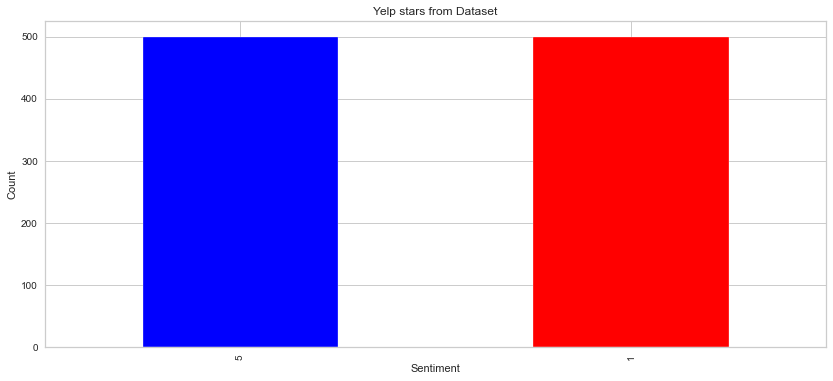

In [25]:
yelp.stars.value_counts().plot(kind = 'bar', figsize = (14,6), title = 'Yelp stars from Dataset', color = ['blue','red'], ylabel = 'Count', xlabel = 'Sentiment')

The dataset has an equal number of positive and negative reviews. Next, we shall try to see what is present in the text data.

We shall separate the dataset into two parts for both the positive and negative reviews and crate a wordcloud.

In [8]:
yelp_good = yelp[yelp.stars == 5]
yelp_good.head()

,stars,text
0,5,I love love LOVE this place. My boss (who is i...
1,5,The best !\n\nFrom my first shredded beef taco...
2,5,I love Coach.\nStylish and trendy without spen...
3,5,This place is great!
4,5,I have been going to the Matador since I was l...


In [9]:
yelp_bad = yelp[yelp.stars == 1]
yelp_bad.head()

,stars,text
500,1,I don't like the pizza hear and if you go for ...
501,1,veerrrrrryyyyyyyyy dirty. I think I will buy t...
502,1,This was by far the worst restaurant experienc...
503,1,I went here because all my friends were peeing...
504,1,I'm very displeased with the service I receive...


We have created 2 dataframes with the positive and negative reviews. Now we must remove the **stopwords** before generating the wordcloud.

We shall show the stopwords that will be used.

In [10]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Construct a wordcloud of the positive reviews.

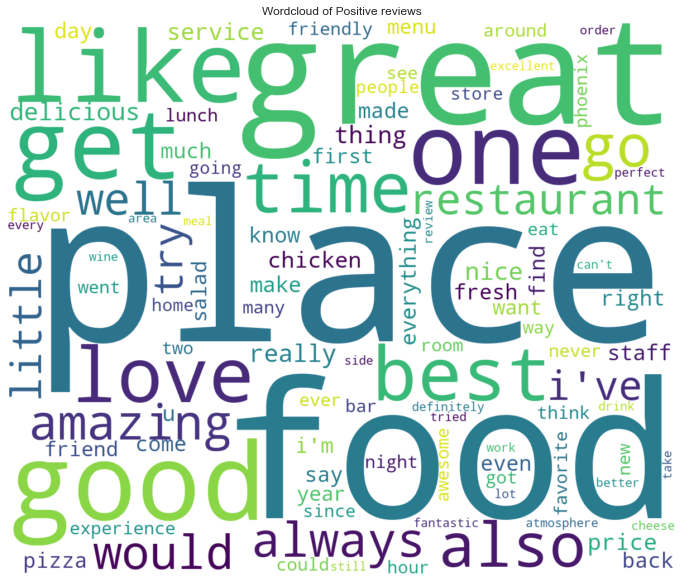

In [23]:
from wordcloud import WordCloud

plt.figure(figsize = (12,12))
text = " ".join(review for review in yelp_good.text)
text = text.lower()
wordcloud = WordCloud(stopwords=stop_words, background_color="white", height = 1000, width = 1200, max_words = 100).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Wordcloud of Positive reviews")
plt.show()

Construct a wordcloud for the negative reviews.

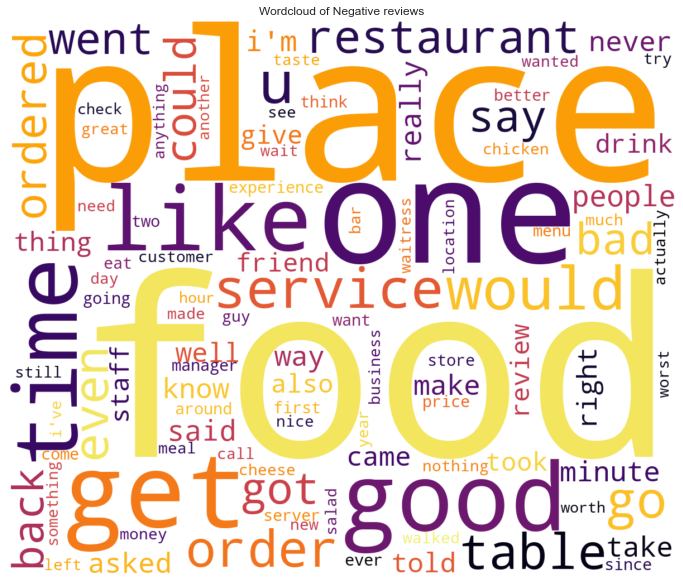

In [24]:
plt.figure(figsize = (12,12))
text = " ".join(review for review in yelp_bad.text)
text = text.lower()
wordcloud = WordCloud(stopwords=stop_words, background_color="white", height = 1000, width = 1200, max_words = 100, colormap = 'inferno').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Wordcloud of Negative reviews")
plt.show()

## Sentiment analysis

We shall perform sentiments analysis on the data so as to predict the positive or negative feeddback from customers. The process will start by creating a function to stem the words in the text.

In [13]:
import string
import nltk
from nltk.stem.porter import PorterStemmer

def tokenize(text):
    tokens = nltk.word_tokenize(text)
    tokens = [token for token in tokens if token not in string.punctuation]
    stemmer = PorterStemmer()
    stems = map(stemmer.stem, tokens)
    return stems

Before using the stemmer, we must first split the dataset into train and test to see how the model performs on a dataset not used in the modelling. We shall also separate the 2 columns and recode the stars column.

In [14]:
from sklearn.model_selection import train_test_split

rating = yelp['stars']
data = yelp['text']

label = rating.map(lambda x: 1 if x==5 else 0)
d_train, d_test, l_train, l_test = train_test_split(data, label, test_size = 0.4, random_state = 23)

Now due to text data not being able to be modeled, we must create a document matrix so as to model in our **MultinomialNB** classifier. We shall also stem and remove stopwords before fitting the data on the model.

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

tf = TfidfVectorizer(stop_words = 'english', tokenizer = tokenize)
tf.fit(d_train)
train_dtm = tf.transform(d_train)
test_dtm = tf.transform(d_test)

nb_model = MultinomialNB()
nb_model.fit(train_dtm, l_train)

MultinomialNB()

Let's see how the model performs on the testing dataset.

In [16]:
from sklearn import metrics

score = nb_model.score(test_dtm, l_test)
print(f'Multinomial classification [Yelp Data] Score = {score:.1%}\n')

l_pred = nb_model.predict(test_dtm)
print(f'Multinomial classification score = {metrics.accuracy_score(l_test, l_pred):.1%}')
print('Classification Report:')
print(metrics.classification_report(l_test, l_pred))

Multinomial classification [Yelp Data] Score = 86.8%

Multinomial classification score = 86.8%
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.94      0.87       194
           1       0.94      0.80      0.86       206

    accuracy                           0.87       400
   macro avg       0.88      0.87      0.87       400
weighted avg       0.88      0.87      0.87       400



Create a confuison matrix to see how the model predicted.

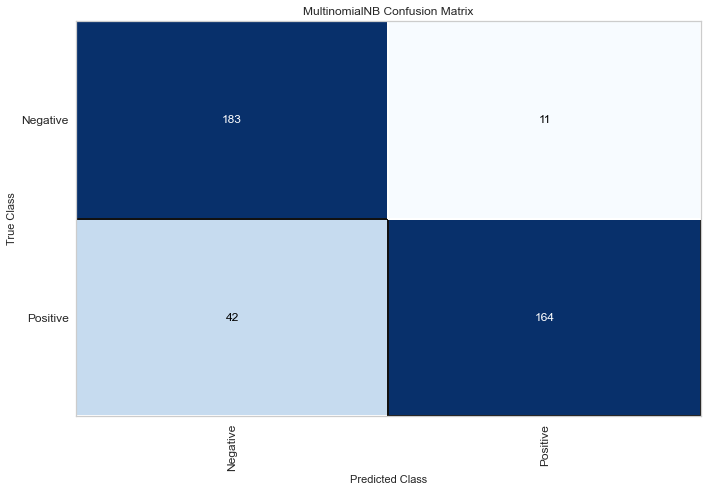

<AxesSubplot:title={'center':'MultinomialNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [22]:
from yellowbrick.classifier import ConfusionMatrix
fig, ax = plt.subplots(figsize = (10,7))

visualizer = ConfusionMatrix(nb_model, encoder = {0:'Negative' , 1:'Positive'}, cmap = 'Blues', ax = ax)
visualizer.fit(train_dtm, l_train)
visualizer.score(test_dtm, l_test)
visualizer.show()